In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/insurance.csv')

1. Initial Data Preparation 

Take a Quick Look at the Data Structure

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check out the Categorical Columns

In [5]:
df['sex'].value_counts() 

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['smoker'].value_counts() 

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
df['region'].value_counts() 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(columns=[feature_to_encode])
    return res
df = encode_and_bind(df, 'sex')
df = encode_and_bind(df, 'smoker')
df = encode_and_bind(df, 'region')

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


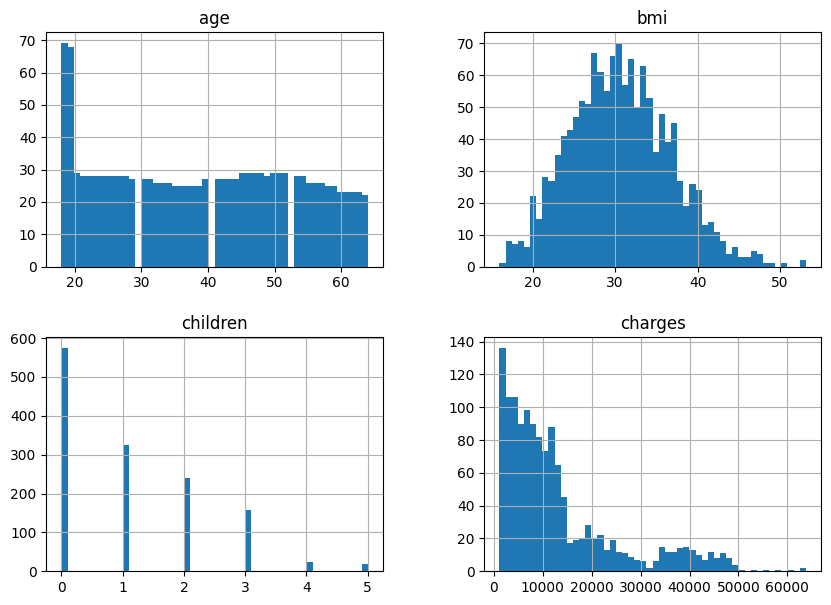

In [10]:
df.hist(bins=50, figsize=(10,7))
plt.show()

No values seem to be capped.

Since we do not have problems with our dimensionality, one hot encoding is a great solution.

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(columns=[feature_to_encode])
    return res
df = encode_and_bind(df, 'sex')
df = encode_and_bind(df, 'smoker')
df = encode_and_bind(df, 'region')

2. Discover and Visualise to Gain Insight

In [ ]:
corr_matrix = df.corr()
corr_matrix['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_female         -0.057292
sex_male            0.057292
smoker_no          -0.787251
smoker_yes          0.787251
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

C:\Users\Effy\AppData\Local\Temp\ipykernel_20020\848796317.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  axes[0,0].get_figure().show()


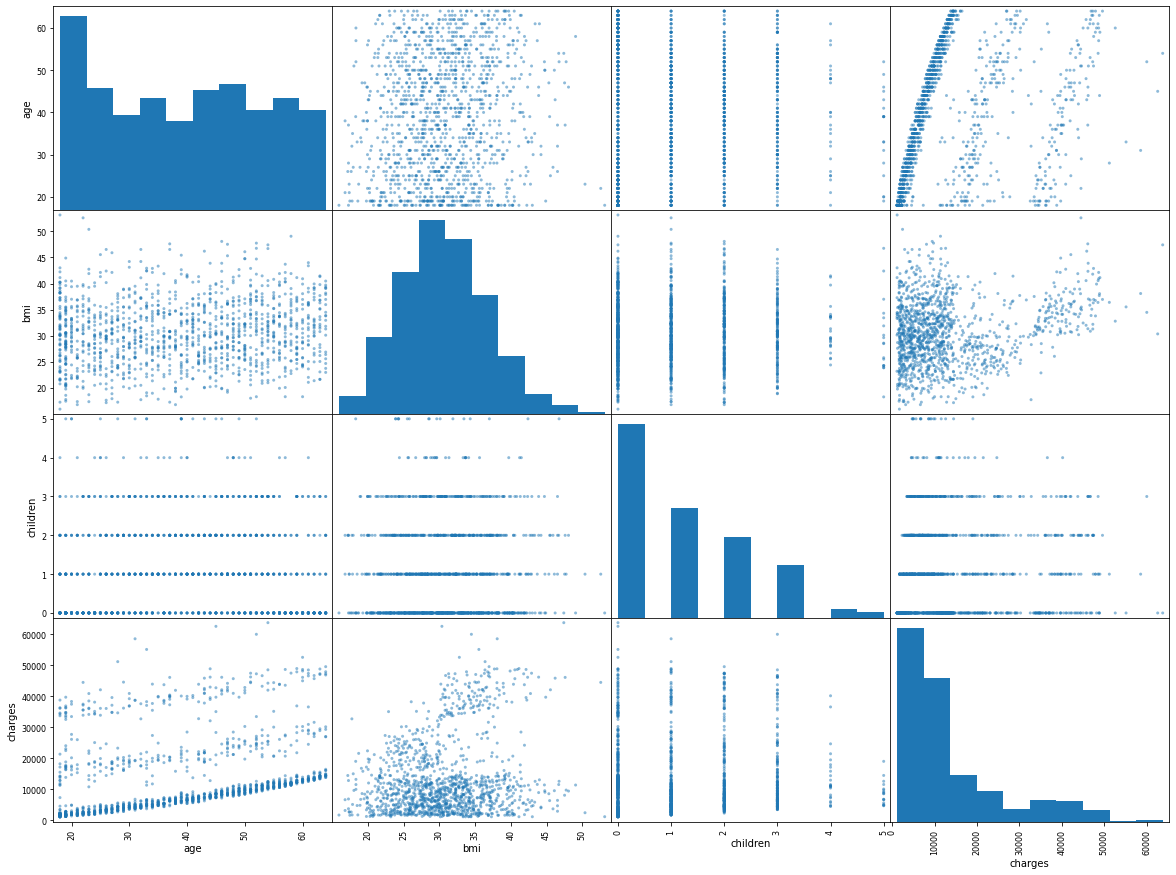

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["age", "bmi", "children","charges"]
axes = scatter_matrix(df[attributes], figsize=(20, 15))
axes[0,0].get_figure().show()

Train / Test Split and Scale

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['charges']), df["charges"], test_size = 0.2, random_state = 21)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train.iloc[:,:3])
x_train.iloc[:,:3] = scaler.fit_transform(x_train.iloc[:,:3].to_numpy())
x_test.iloc[:,:3] = scaler.transform(x_test.iloc[:,:3].to_numpy())

4. Select and Train a Model

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [15]:
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
print((-1)*cross_val_score(lr_clf, x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))

[6565.65366438 5558.37891667 5506.76884376 6624.05054587 6216.44599586]


In [16]:
knn_clf = KNeighborsRegressor(n_neighbors=5)
knn_clf.fit(x_train,y_train)
print((-1)*cross_val_score(knn_clf, x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))

[6628.67892128 5578.57645143 5962.93579271 6332.7493751  6236.57589623]


In [17]:
rfc_clf = RandomForestRegressor(max_depth=4, random_state=0)
rfc_clf.fit(x_train,y_train)
print((-1)*cross_val_score(rfc_clf, x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))

[4939.50626019 4134.51603676 4259.81039404 4869.99941574 4211.29422394]


In [18]:
xgb_clf = xgb.XGBRegressor(n_estimators=15, max_depth=3)
xgb_clf.fit(x_train,y_train)
print((-1)*cross_val_score(xgb_clf, x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))

[5023.93886742 4055.39935311 4220.57903561 4810.9790257  4124.71502131]


Let's move forward with XGBoost since it seems to be one of the better performing models

5. Fine Tune the Model with Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(2,30,1),
    'learning_rate': [0.01,0.1, 0.05, 0.1, 0.3, 0.5]
}
xgb_clf = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True)
grid_search.fit(x_train,y_train) 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': range(2, 10),
                         'n_estimators': range(2, 30)},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [20]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

4756.572136459242

In [21]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3626.6313028 , 5665.46576834])

Next Steps: Launch, Monitor and Maintain